This dataset contains various features related to cars, including the year of manufacture, selling price, kilometers driven, fuel type,
seller type, transmission type, number of previous owners, mileage, and engine specifications.
These attributes provide valuable insights into the factors influencing car prices.

Task 
Developing a predictive model to estimating the selling "PRICE" of Cars. 


In [17]:
import pandas as pd

In [19]:
#loading the dataset
file_path = r'C:\Users\USER\OneDrive\Documents\cardekho.csv'
df = pd.read_csv(file_path)


In [42]:
#Exploring the data
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [44]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [25]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [29]:
# Checking for missing values
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


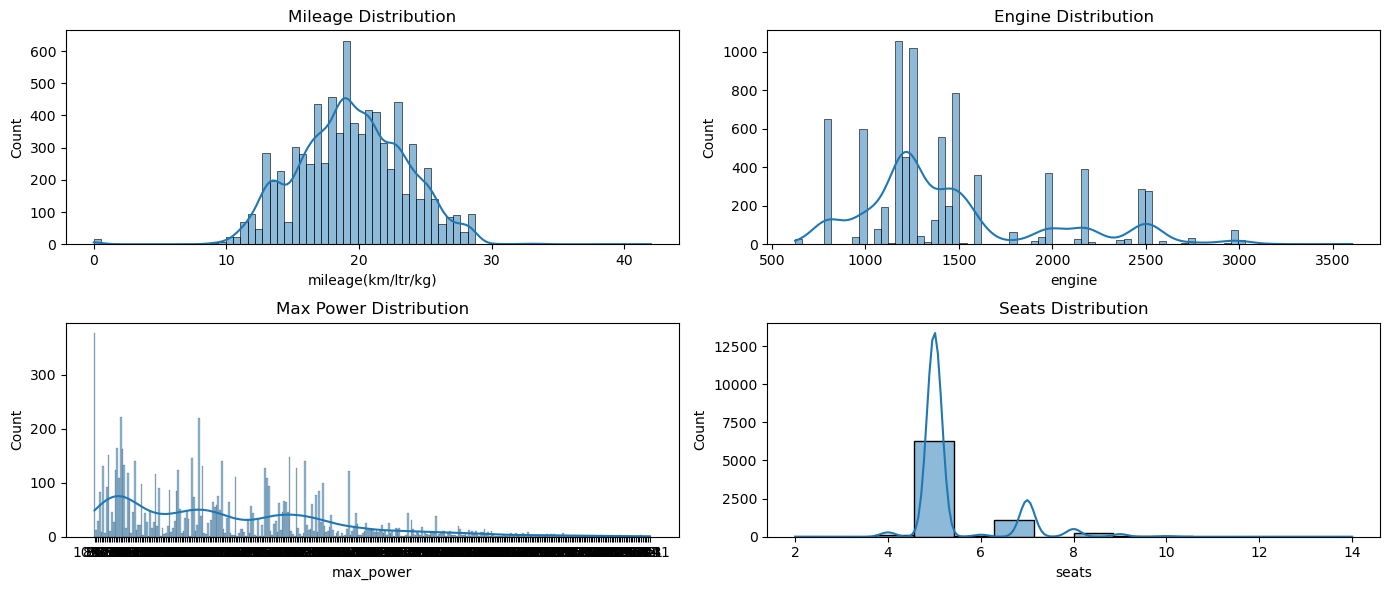

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the columns with missing values
plt.figure(figsize=(14, 6))

# Mileage
plt.subplot(2, 2, 1)
sns.histplot(df['mileage(km/ltr/kg)'].dropna(), kde=True)
plt.title('Mileage Distribution')

# Engine
plt.subplot(2, 2, 2)
sns.histplot(df['engine'].dropna(), kde=True)
plt.title('Engine Distribution')

# Max Power
plt.subplot(2, 2, 3)
sns.histplot(df['max_power'].dropna(), kde=True)
plt.title('Max Power Distribution')

# Seats
plt.subplot(2, 2, 4)
sns.histplot(df['seats'].dropna(), kde=True)
plt.title('Seats Distribution')

plt.tight_layout()
plt.show()


DATA CLEANING

In [46]:
# Convert the 'max_power' column to numeric 
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [48]:
# Filling missing values with the mean for 'mileage(km/ltr/kg)'
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())

# Filling missing values with the median for 'engine' and 'max_power'
df['engine'] = df['engine'].fillna(df['engine'].median())
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

# Filling missing values with the mode for 'seats'
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])


In [50]:
# Verify that there are no more missing values
print(df.isnull().sum())

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


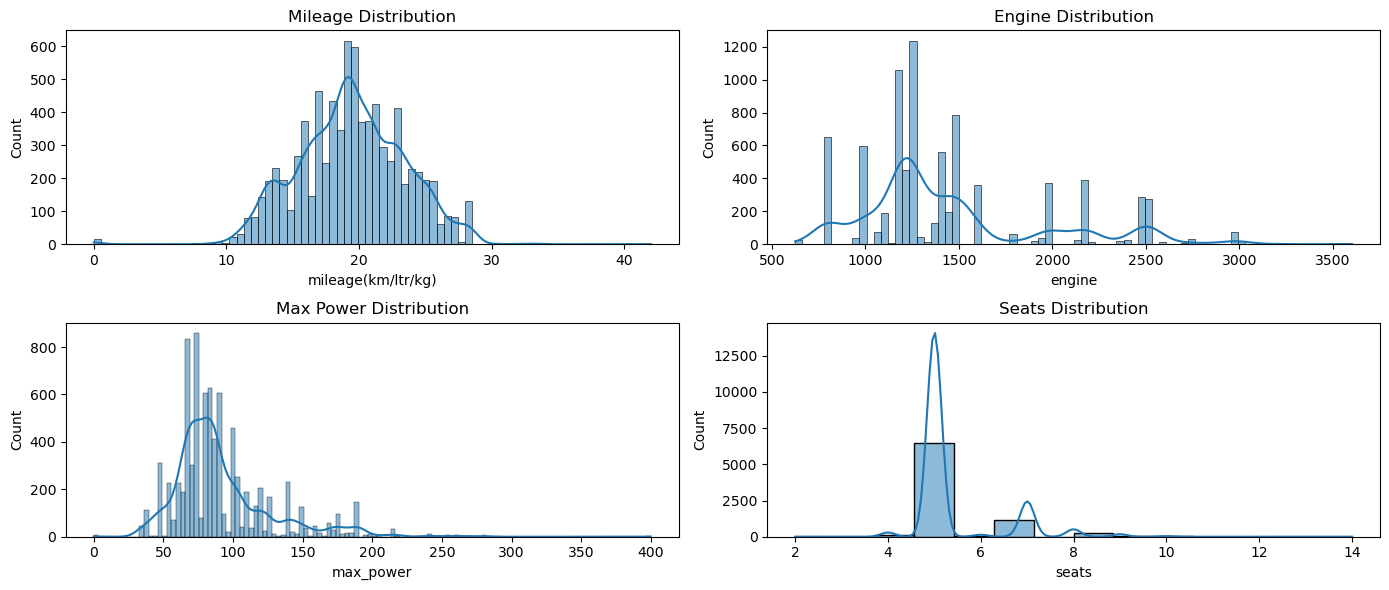

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the columns with missing values
plt.figure(figsize=(14, 6))

# Mileage
plt.subplot(2, 2, 1)
sns.histplot(df['mileage(km/ltr/kg)'].dropna(), kde=True)
plt.title('Mileage Distribution')

# Engine
plt.subplot(2, 2, 2)
sns.histplot(df['engine'].dropna(), kde=True)
plt.title('Engine Distribution')

# Max Power
plt.subplot(2, 2, 3)
sns.histplot(df['max_power'].dropna(), kde=True)
plt.title('Max Power Distribution')

# Seats
plt.subplot(2, 2, 4)
sns.histplot(df['seats'].dropna(), kde=True)
plt.title('Seats Distribution')

plt.tight_layout()
plt.show()


                        year  selling_price  km_driven  mileage(km/ltr/kg)  \
year                1.000000       0.414092  -0.418006            0.310383   
selling_price       0.414092       1.000000  -0.225534           -0.125454   
km_driven          -0.418006      -0.225534   1.000000           -0.171426   
mileage(km/ltr/kg)  0.310383      -0.125454  -0.171426            1.000000   
engine              0.035851       0.458345   0.198911           -0.574469   
max_power           0.224704       0.747935  -0.040599           -0.373165   
seats               0.010222       0.047135   0.219860           -0.450930   

                      engine  max_power     seats  
year                0.035851   0.224704  0.010222  
selling_price       0.458345   0.747935  0.047135  
km_driven           0.198911  -0.040599  0.219860  
mileage(km/ltr/kg) -0.574469  -0.373165 -0.450930  
engine              1.000000   0.703612  0.612220  
max_power           0.703612   1.000000  0.194556  
seats      

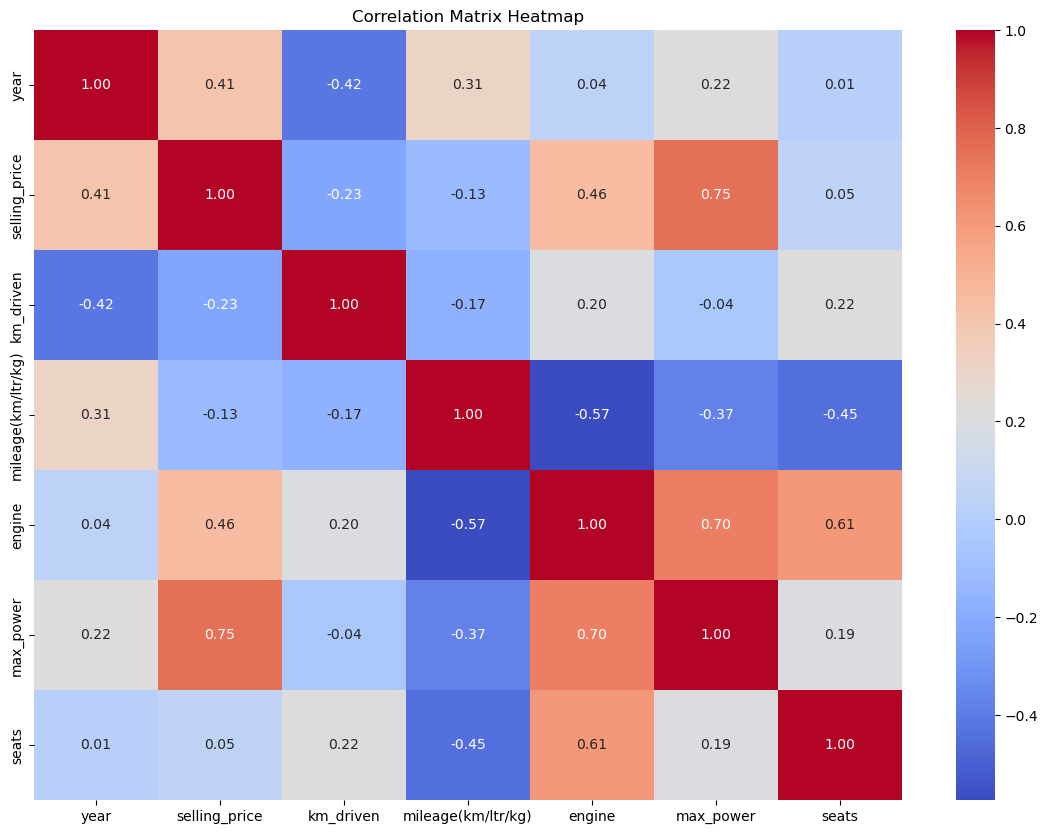

selling_price         1.000000
max_power             0.747935
engine                0.458345
year                  0.414092
seats                 0.047135
mileage(km/ltr/kg)   -0.125454
km_driven            -0.225534
Name: selling_price, dtype: float64


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation with the target variable 'selling_price'
correlation_with_price = correlation_matrix['selling_price'].sort_values(ascending=False)
print(correlation_with_price)


In [60]:
# Selecting features based on their correlation with selling_price
selected_features = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
X = df[selected_features]
y = df['selling_price']


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure that we don't set values on a copy
X = df[selected_features].copy()

# Calculate VIF for each feature
X['Intercept'] = 1  # Add Intercept for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
X = X.drop(['Intercept'], axis=1)  # Drop Intercept after VIF calculation

print(vif_data)


              Feature            VIF
0                year       1.629846
1           km_driven       1.348184
2  mileage(km/ltr/kg)       1.913538
3              engine       4.204273
4           max_power       2.737342
5               seats       2.084744
6           Intercept  397539.561667


MODEL TRAINING



In [69]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [73]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Directly calculating RMSE
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2: {r2}")


Model Performance:
MAE: 73241.29780471633
MSE: 26503252010.568363
RMSE: 162798.1941256363
R2: 0.9595669242824341


In [85]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [87]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)


In [89]:
# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Score: -67615.19558128327


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
# Make predictions with the tuned model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model Performance:\nMAE: {mae_tuned}\nMSE: {mse_tuned}\nRMSE: {rmse_tuned}\nR2: {r2_tuned}")


Tuned Model Performance:
MAE: 70405.36856285555
MSE: 25322041158.77832
RMSE: 159129.00791112322
R2: 0.9613689668313934


In [93]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validation MAE: {mean_cv_score} ± {std_cv_score}")


Cross-Validation MAE: -67008.58400410177 ± 3338.165774391853


In [95]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
# Initialize the individual models
xgb_model = XGBRegressor(random_state=42, **best_params)  # Use the best parameters from GridSearchCV
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [99]:
# Combine the models using Voting Regressor
ensemble_model = VotingRegressor([('xgb', xgb_model), ('rf', rf_model), ('gb', gb_model)])


In [101]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

In [103]:
# Evaluate the ensemble model
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Performance:\nMAE: {mae_ensemble}\nMSE: {mse_ensemble}\nRMSE: {rmse_ensemble}\nR2: {r2_ensemble}")


Ensemble Model Performance:
MAE: 73259.73952871365
MSE: 23020882675.396545
RMSE: 151726.3414025282
R2: 0.9648795894206362


In [121]:
!pip install bayesian-optimization

In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [127]:
# Step 2: Load and Prepare Data
file_path = r'C:\Users\USER\OneDrive\Documents\cardekho.csv'
df = pd.read_csv(file_path)

# Ensure 'max_power' is numeric
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')


In [129]:
# Impute missing values
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())
df['engine'] = df['engine'].fillna(df['engine'].median())
df['max_power'] = df['max_power'].fillna(df['max_power'].median())
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [133]:
#Feature Engineering
df['age'] = 2024 - df['year']
df['mileage_per_engine'] = df['mileage(km/ltr/kg)'] / df['engine']
df['log_km_driven'] = np.log1p(df['km_driven'])  # log1p is used to handle zero values
df['engine_squared'] = df['engine'] ** 2
df['max_power_cubed'] = df['max_power'] ** 3
df['mileage_bin'] = pd.cut(df['mileage(km/ltr/kg)'], bins=[0, 15, 25, np.inf], labels=['low', 'medium', 'high'])


In [135]:
# Drop original year column since age is a better feature
df.drop(['year'], axis=1, inplace=True)

# Handling categorical features after binning
df = pd.get_dummies(df, columns=['mileage_bin'], drop_first=True)

# Ensure only numeric columns are selected
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].drop('selling_price', axis=1)
y = df['selling_price']

In [137]:
# Use SelectKBest to select top 10 features
selector = SelectKBest(f_regression, k=10)
X_new = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print(f"Selected Features: {selected_columns}")


Selected Features: Index(['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats',
       'age', 'mileage_per_engine', 'log_km_driven', 'engine_squared',
       'max_power_cubed'],
      dtype='object')


In [139]:
# Step 3: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [141]:
# Step 4: Hyperparameter Tuning with Random Search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4, 5]
}


In [143]:
random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring='neg_mean_absolute_error',
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
print(f"Best Parameters from Random Search: {best_params_random}")

xgb_random_model = XGBRegressor(random_state=42, **best_params_random)
xgb_random_model.fit(X_train, y_train)
y_pred_random = xgb_random_model.predict(X_test)
print(f"Tuned Model with Random Search Performance:\nMAE: {mean_absolute_error(y_test, y_pred_random)}\nMSE: {mean_squared_error(y_test, y_pred_random)}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_random))}\nR2: {r2_score(y_test, y_pred_random)}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters from Random Search: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9}
Tuned Model with Random Search Performance:
MAE: 67544.4415023447
MSE: 18597033339.444504
RMSE: 136370.94023084428
R2: 0.971628566304391


In [149]:
# Step 5: Model Ensemble
base_models = [
    ('xgb', xgb.XGBRegressor(random_state=42, **best_params_random)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=RidgeCV())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
print(f"Stacking Model Performance:\nMAE: {mean_absolute_error(y_test, y_pred_stacking)}\nMSE: {mean_squared_error(y_test, y_pred_stacking)}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_stacking))}\nR2: {r2_score(y_test, y_pred_stacking)}")


Stacking Model Performance:
MAE: 70015.79168298164
MSE: 18537713613.703968
RMSE: 136153.27250457098
R2: 0.9717190638388616


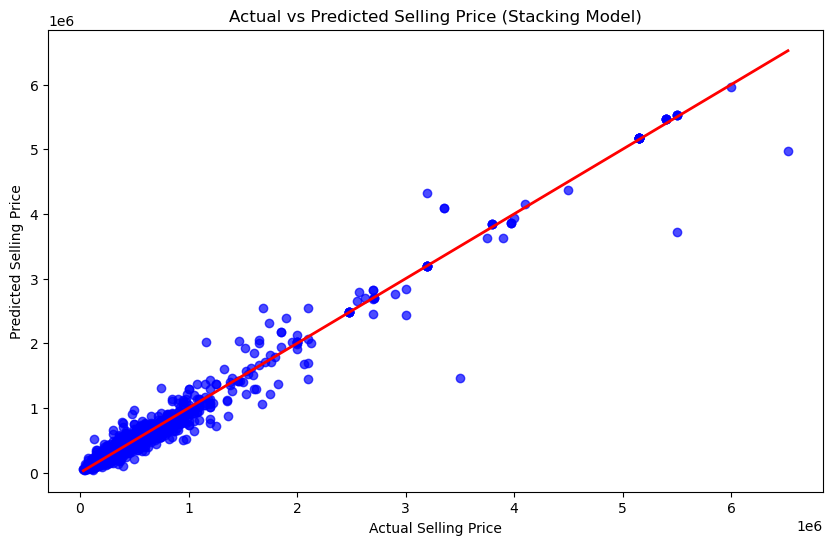

In [151]:
import matplotlib.pyplot as plt

# Visualization for the stacking model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacking, alpha=0.7, color='b')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Stacking Model)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()


In [153]:
# Evaluate the model on the test set
y_test_pred = stacking_model.predict(X_test)

# Calculate performance metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Performance:\nMAE: {mae_test}\nMSE: {mse_test}\nRMSE: {rmse_test}\nR2: {r2_test}")


Test Set Performance:
MAE: 70015.79168298164
MSE: 18537713613.703968
RMSE: 136153.27250457098
R2: 0.9717190638388616


In [157]:
import joblib

# Save the stacking model
joblib.dump(stacking_model, 'stacking_model.pkl')

# Save the selector and other preprocessing steps if necessary
joblib.dump(selector, 'selector.pkl')
joblib.dump(poly, 'poly.pkl')


['poly.pkl']

In [161]:
import numpy as np

np.random.seed(42)
